# Stock Prediction Using Regression

In [76]:
import sklearn
import pandas_datareader.data as dr
import numpy
import datetime as dt
import matplotlib.pyplot as plt

In [77]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 8, 31)

df = dr.DataReader("TSLA", 'yahoo', start, end)

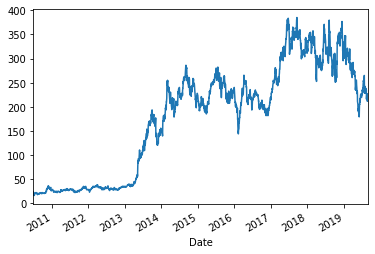

In [78]:
df["Adj Close"].plot();

## Feature Engineering

In [79]:

df['HighLowPer'] = 100 * (df['High'] - df['Low']) / df['Close']
df['ChangePer'] = 100 * (df['Close'] - df['Open']) / df['Open']
df = df.loc[:, ['HighLowPer', 'ChangePer', 'Volume', 'Adj Close']]

In [80]:
df.describe()

,HighLowPer,ChangePer,Volume,Adj Close
count,2310.000000,2310.000000,2.310000e+03,2310.000000
mean,3.926099,-0.001123,5.315643e+06,178.744762
std,2.380046,2.757467,4.671984e+06,113.555702
min,0.909335,-19.753517,1.185000e+05,15.800000
25%,2.469594,-1.463892,1.721875e+06,33.782499
50%,3.385125,-0.053057,4.381800e+06,208.080002
75%,4.664487,1.431548,7.131575e+06,261.300003
max,31.226452,25.736839,3.716390e+07,385.000000


In [81]:
testing_per = 0.01
y = df['Adj Close']
df.drop(['Adj Close'], axis = 1, inplace = True)
X = df

#int(len(df))